In [216]:
'''
https://portal.icuregswe.org/utdata/sv/report/prod.belaggning

REMEMBER to add new,additional years to list years below 
'''

'\nREMEMBER to add new,additional years to list years below \n'

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [218]:
all_data = pd.DataFrame()

In [219]:
def read_occupacy(fname):
    excel_file = pd.ExcelFile(fname)
    
    sheet = excel_file.sheet_names
    
    df = excel_file.parse(sheet_names=sheet,skiprows=1)
    df['date'] = pd.to_datetime(df['Datum'])
    df.drop('Datum',inplace=True,axis=1)
    df.set_index('date',inplace=True)
    df.rename(columns={'Platser' : 'occupacy'},inplace=True)
    df = df.resample('D').mean()
    
    
    return (df)

In [220]:
years = ['2016','2017','2018','2019','2020','2021']

In [221]:
for y in years:
    df = read_occupacy('iva_occupacy_' + y + '.xlsx')
    all_data = pd.concat([all_data,df])


In [222]:
all_data

,occupacy
date,
2016-01-01,340.005917
2016-01-02,346.108696
2016-01-03,326.188406
2016-01-04,342.243094
2016-01-05,353.516854
...,...
2021-12-03,103.315217
2021-12-04,74.218750
2021-12-05,55.033333


In [223]:
all_data.index.dayofyear

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            332, 333, 334, 335, 336, 337, 338, 339, 340, 341],
           dtype='int64', name='date', length=2168)

In [224]:
all_data.loc['2021'].index.isocalendar().week

date
2021-01-01    53
2021-01-02    53
2021-01-03    53
2021-01-04     1
2021-01-05     1
              ..
2021-12-03    48
2021-12-04    48
2021-12-05    48
2021-12-06    49
2021-12-07    49
Freq: D, Name: week, Length: 341, dtype: UInt32

In [225]:
last_good_day = (all_data.index[-1] - pd.DateOffset(weeks=2))
last_good_day_nr = last_good_day.dayofyear

Text(0.5, 1.0, 'SWEDEN : Daily ICU occupacy 2016 - YTD 2021-12-07\n\nDataSource : Svenska Intensivvårdsregistret [Swedish ICU Registry]')

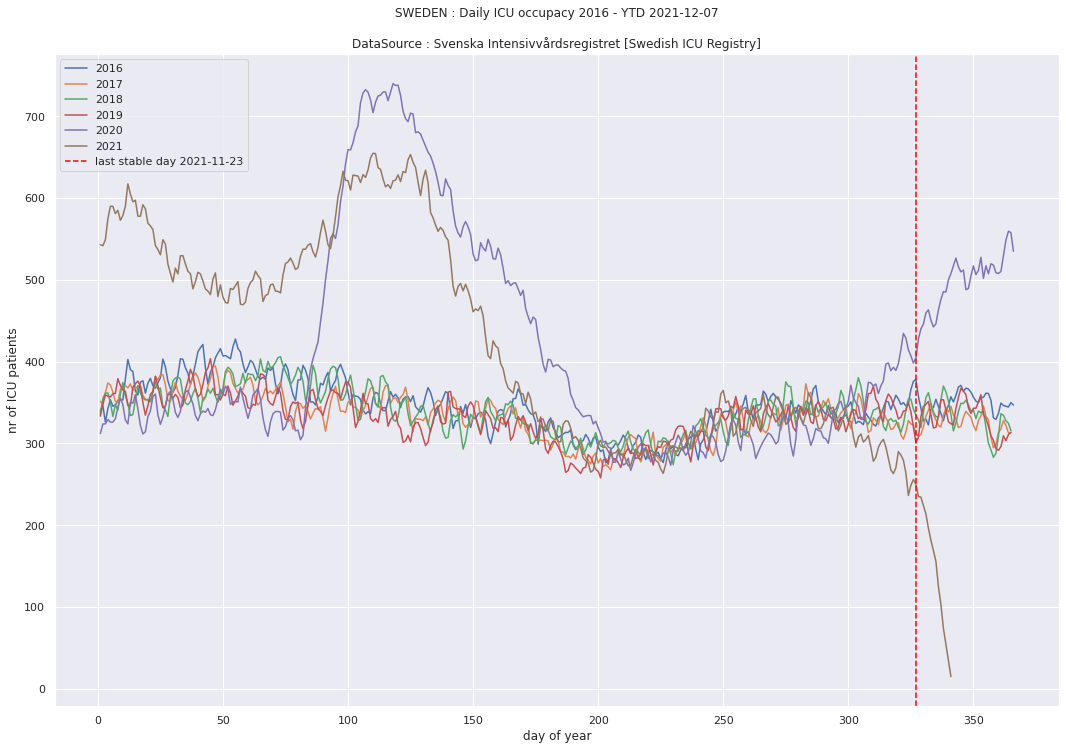

In [226]:
plt.figure(figsize=(18,12))

for y in years:
    plt.plot(all_data.loc[y].index.dayofyear,all_data.loc[y],label=y)
    
plt.xlabel('day of year')
plt.ylabel('nr of ICU patients')
plt.axvline(last_good_day_nr,label='last stable day {}'.format(last_good_day.date()),color='red',ls='dashed')
plt.legend(loc='upper left')
plt.title('SWEDEN : Daily ICU occupacy ' + years[0] +' - YTD {}\n\nDataSource : Svenska Intensivvårdsregistret [Swedish ICU Registry]'.format(
all_data.loc['2021'].index[-1].date()))


In [236]:
base_dates = all_data.loc[:'2019']
baseline = base_dates.groupby(base_dates.index.dayofyear).mean()
baseline

,occupacy
date,
1,340.403479
2,349.110890
3,352.243204
4,358.914448
5,358.049587
...,...
362,329.542717
363,324.561254
364,323.315880


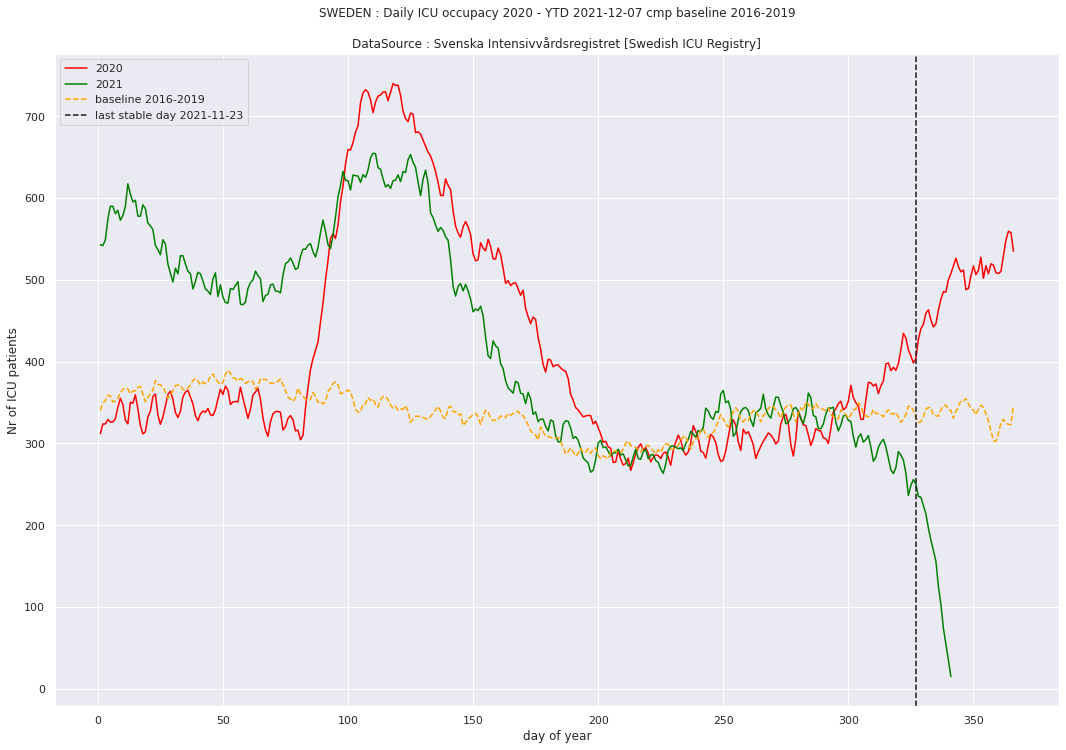

In [260]:
fig,ax = plt.subplots(figsize=(18,12))

ax.plot(all_data.loc['2020'].index.dayofyear,all_data.loc['2020'],label='2020',color='red')
ax.plot(all_data.loc['2021'].index.dayofyear,all_data.loc['2021'],label='2021',color='green')
ax.plot(baseline.index,baseline,label='baseline 2016-2019',ls='dashed',color='orange')
ax.axvline(last_good_day_nr,label='last stable day {}'.format(last_good_day.date()),color='k',ls='dashed')
ax.legend(loc='upper left')
ax.set_xlabel('day of year')
ax.set_ylabel('Nr of ICU patients')
plt.title('SWEDEN : Daily ICU occupacy 2020 - YTD {} cmp baseline 2016-2019\n\nDataSource : Svenska Intensivvårdsregistret [Swedish ICU Registry]'.format(
all_data.loc['2021'].index[-1].date()))
plt.savefig('iva_occupacy_vs_baseline.jpg',format='jpg')


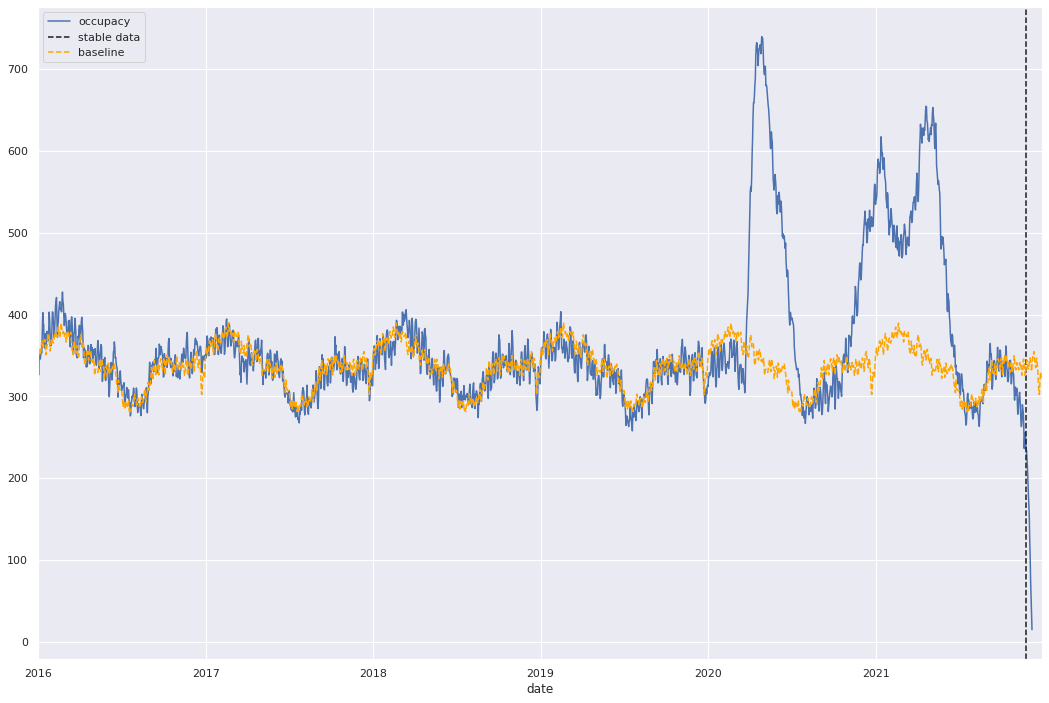

In [302]:

ax = all_data.plot(figsize=(18,12))
ax.axvline(last_good_day,label='last stable day {}'.format(last_good_day.date()),color='k',ls='dashed')

non_leap_base = baseline.iloc[:-1]

full_period_base = pd.concat([leap_base,non_leap_base,non_leap_base,non_leap_base,leap_base,non_leap_base])
full_period_base.index = pd.date_range('2016-01-01',periods=len(full_period_base))
full_period_base.plot(ax=ax,ls='dashed',color='orange')
ax.legend(['occupacy','stable data','baseline'])

In [318]:
### FHM ###
fhm_url = 'https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data'
fhm_file = pd.ExcelFile(fhm_url)
fhm_file.sheet_names


['Antal per dag region',
 'Antal avlidna per dag',
 'Antal intensivvårdade per dag',
 'Totalt antal per region',
 'Totalt antal per kön',
 'Totalt antal per åldersgrupp',
 'Veckodata Region',
 'Veckodata Kommun_stadsdel',
 'Veckodata Riket',
 'FOHM  9 Dec 2021']

In [343]:
fhm_icu = fhm_file.parse(sheet_name=fhm_file.sheet_names[2],index_col=0,parse_dates=True)
fhm_icu.rename(columns={'Antal_intensivvårdade' : 'ICU_Daily_New_Covid_cases'},inplace=True)
fhm_icu.index.names=['date']

In [344]:
fhm_icu

,ICU_Daily_New_Covid_cases
date,
2020-03-06,1
2020-03-07,1
2020-03-08,1
2020-03-09,0
2020-03-10,2
...,...
2021-12-04,3
2021-12-05,5
2021-12-06,5


In [345]:
sir_fhm = all_data.join(fhm_icu).dropna()
sir_fhm

,occupacy,ICU_Daily_New_Covid_cases
date,,
2020-03-06,331.376543,1.0
2020-03-07,316.763975,1.0
2020-03-08,308.671875,1.0
2020-03-09,326.267760,0.0
2020-03-10,336.220930,2.0
...,...,...
2021-12-03,103.315217,5.0
2021-12-04,74.218750,3.0
2021-12-05,55.033333,5.0


In [347]:
sir_fhm['ICU_Daily_non_Covid_beds_in_use'] = sir_fhm['occupacy'] - sir_fhm['ICU_Daily_New_Covid_cases']
sir_fhm

,occupacy,ICU_Daily_New_Covid_cases,ICU_Daily_non_Covid_beds_in_use
date,,,
2020-03-06,331.376543,1.0,330.376543
2020-03-07,316.763975,1.0,315.763975
2020-03-08,308.671875,1.0,307.671875
2020-03-09,326.267760,0.0,326.267760
2020-03-10,336.220930,2.0,334.220930
...,...,...,...
2021-12-03,103.315217,5.0,98.315217
2021-12-04,74.218750,3.0,71.218750
2021-12-05,55.033333,5.0,50.033333


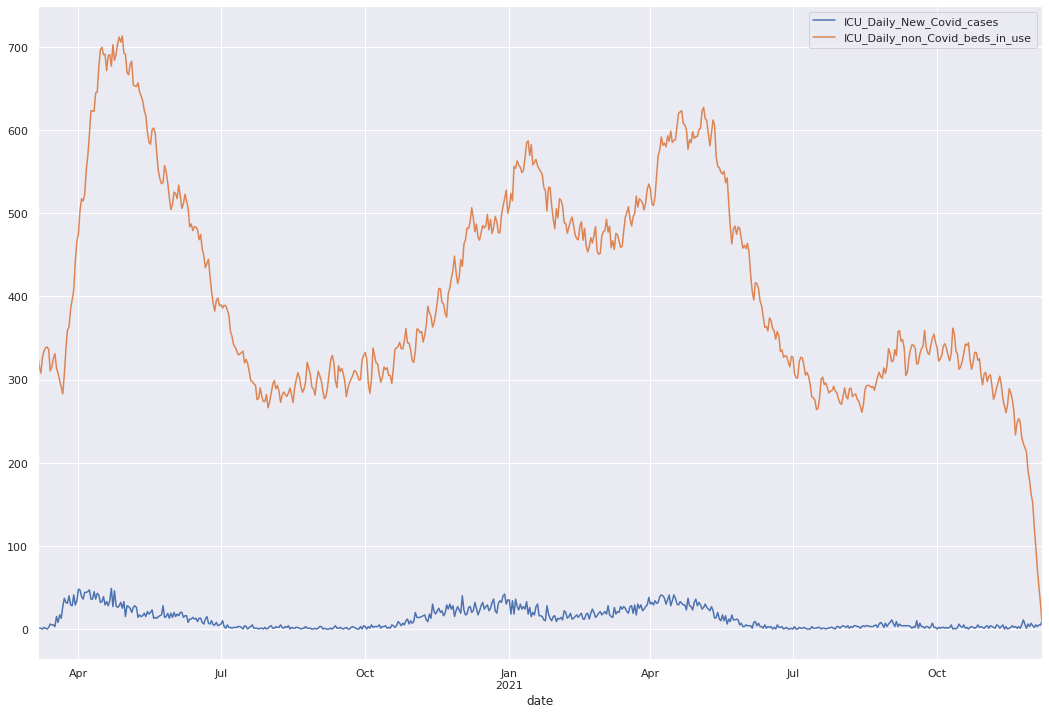

In [354]:
'''
Unable to draw any conclusions from the data since there's no info in the FHM data
on when a new case checks out
'''
ax = sir_fhm.plot(y=['ICU_Daily_New_Covid_cases','ICU_Daily_non_Covid_beds_in_use'],figsize=(18,12))


In [355]:
'''
https://portal.icuregswe.org/siri/en/report/corona.covid-dagligen
'''
sir_covid_url = 'iva_covid_occupancy.xlsx'
sir_covid_file = pd.ExcelFile(sir_covid_url)
sir_covid_file.sheet_names

['SIRI-portalen']

In [358]:
sir_covid = sir_covid_file.parse(sheet_name=sir_covid_file.sheet_names[0],skiprows=1,index_col=0,parse_dates=True)
sir_covid = sir_covid['Covid-19 Totalt']
sir_covid

Datum
2020-12-09    263
2020-12-10    260
2020-12-11    260
2020-12-12    255
2020-12-13    257
             ... 
2021-12-05     46
2021-12-06     47
2021-12-07     50
2021-12-08     54
2021-12-09     56
Name: Covid-19 Totalt, Length: 366, dtype: int64

In [448]:
sir_covid_non_covid = all_data.join(sir_covid).dropna()
sir_covid_non_covid

,occupacy,Covid-19 Totalt
date,,
2020-12-09,516.029762,263.0
2020-12-10,509.652174,260.0
2020-12-11,511.939394,260.0
2020-12-12,487.884892,255.0
2020-12-13,489.421053,257.0
...,...,...
2021-12-03,103.315217,46.0
2021-12-04,74.218750,46.0
2021-12-05,55.033333,46.0


In [449]:
sir_covid_non_covid['Non-Covid'] = sir_covid_non_covid['occupacy'] - sir_covid_non_covid['Covid-19 Totalt']
sir_covid_non_covid

,occupacy,Covid-19 Totalt,Non-Covid
date,,,
2020-12-09,516.029762,263.0,253.029762
2020-12-10,509.652174,260.0,249.652174
2020-12-11,511.939394,260.0,251.939394
2020-12-12,487.884892,255.0,232.884892
2020-12-13,489.421053,257.0,232.421053
...,...,...,...
2021-12-03,103.315217,46.0,57.315217
2021-12-04,74.218750,46.0,28.218750
2021-12-05,55.033333,46.0,9.033333


In [450]:
sir_covid_non_covid.rename(columns={'Covid-19 Totalt' : 'Covid','occupacy' : 'Total'},inplace=True)

In [451]:
sir_covid_non_covid

,Total,Covid,Non-Covid
date,,,
2020-12-09,516.029762,263.0,253.029762
2020-12-10,509.652174,260.0,249.652174
2020-12-11,511.939394,260.0,251.939394
2020-12-12,487.884892,255.0,232.884892
2020-12-13,489.421053,257.0,232.421053
...,...,...,...
2021-12-03,103.315217,46.0,57.315217
2021-12-04,74.218750,46.0,28.218750
2021-12-05,55.033333,46.0,9.033333


In [452]:
# daily average per week 
sir_covid_non_covid = sir_covid_non_covid.resample('W').mean()

In [453]:
sir_covid_non_covid.index

DatetimeIndex(['2020-12-13', '2020-12-20', '2020-12-27', '2021-01-03',
               '2021-01-10', '2021-01-17', '2021-01-24', '2021-01-31',
               '2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28',
               '2021-03-07', '2021-03-14', '2021-03-21', '2021-03-28',
               '2021-04-04', '2021-04-11', '2021-04-18', '2021-04-25',
               '2021-05-02', '2021-05-09', '2021-05-16', '2021-05-23',
               '2021-05-30', '2021-06-06', '2021-06-13', '2021-06-20',
               '2021-06-27', '2021-07-04', '2021-07-11', '2021-07-18',
               '2021-07-25', '2021-08-01', '2021-08-08', '2021-08-15',
               '2021-08-22', '2021-08-29', '2021-09-05', '2021-09-12',
               '2021-09-19', '2021-09-26', '2021-10-03', '2021-10-10',
               '2021-10-17', '2021-10-24', '2021-10-31', '2021-11-07',
               '2021-11-14', '2021-11-21', '2021-11-28', '2021-12-05',
               '2021-12-12'],
              dtype='datetime64[ns]', name='dat

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]


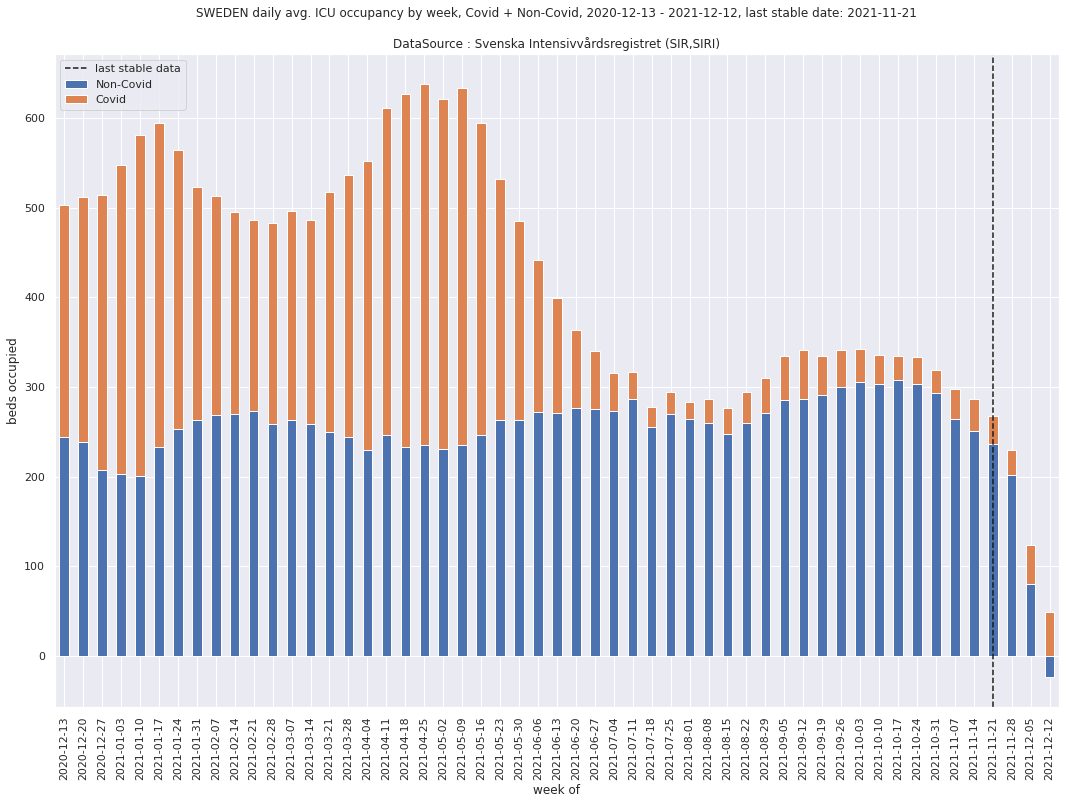

In [454]:
fig,ax = plt.subplots(figsize=(18,12))
sir_covid_non_covid.index = sir_covid_non_covid.index.date
sir_covid_non_covid.plot(ax=ax,kind='bar',stacked=True,y=['Non-Covid','Covid'])
print (ax.get_xticks())
ax.axvline(ax.get_xticks()[-4],color='k',ls='dashed',label='last stable data')
ax.legend(loc='upper left')
ax.set_title('SWEDEN daily avg. ICU occupancy by week, Covid + Non-Covid, {} - {}, last stable date: {}\n\nDataSource : Svenska Intensivvårdsregistret (SIR,SIRI)'.format(
sir_covid_non_covid.index[0],sir_covid_non_covid.index[-1],sir_covid_non_covid.index[-4]))
ax.set_ylabel('beds occupied')
ax.set_xlabel('week of')
plt.savefig('iva_covid_non_covid_occupancy.jpg',format='jpg')